# Linear Regression



      f(x,z) = 15*xs + 20*zs - 120
    
   

### Import the relevant libraries

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


### Generate the targets

In [3]:
# A small random noise to the function i.e. f(x,z) = 15*xs + 20*zs - 120 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

targets = 15*xs + 20*zs - 120 + noise

print (targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

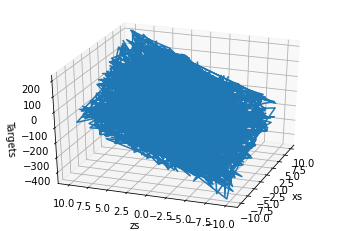

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
fig = plt.figure()
# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')
# Choose the axes.
ax.plot(xs, zs, targets)
# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

#Value of azim=0;100;200.
ax.view_init(azim=200)

plt.show()

# Targets back to the shape that they were in before plotting.
targets = targets.reshape(observations,1)

### Initialize variables

In [5]:
# We will initialize the weights and biases randomly in some small initial range.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# The weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[0.0026999 ]
 [0.03275816]]
[0.00752458]


### Set a learning rate

In [6]:
learning_rate = 0.02

### Train the model

In [7]:
for i in range (500):
    
    # The linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    
    # The deltas are the differences between the outputs and the targets (vector 1000 x 1)
    deltas = outputs - targets
        
    # We are considering the L2-norm loss (scaled by observations) 
    loss = np.sum(deltas ** 2) /  observations
    
    # The loss function value at each step to observe whether it is decreasing as desired.
    print (loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

34179.09935587779
16184.854353545632
13544.69489403599
12767.56895206692
12233.859947984933
11747.14403979417
11282.828946098507
10837.242357777319
10409.300363262679
9998.263353201124
9603.458402885
9224.243852996477
8860.003974085148
8510.147426091846
8174.106229747748
7851.334835731799
7541.309237870482
7243.526122290328
6957.502050289636
6682.7726734930775
6418.8919800008025
6165.4315703063285
5921.979961807458
5688.141920781128
5463.537820737626
5247.803026112525
5040.587300295764
4841.5542370368485
4650.380714303067
4466.756369704096
4290.383096631365
4120.974560294169
3958.2557328668636
3801.9624469924374
3651.8409669176262
3507.647576563296
3369.148183861367
3236.117940715917
3108.340877971504
2985.609554796079
2867.724721909284
2754.4949981094
2645.7365595737997
2541.2728414284934
2440.9342511022846
2344.557893000163
2251.987304048985
2163.0721996860684
2077.668229878358
1995.6367447760542
1916.8445696202577
1841.1637885391979
1768.4715368820487
1698.6498017531983
1631.5852304

### Print weights and biases and see if we have worked correctly.

In [8]:
print (weights, biases)

[[15.00478924]
 [20.00219192]] [-119.95209033]


### Plot last outputs vs targets
The closer this plot is to a 45 degree line, the closer target and output values are.

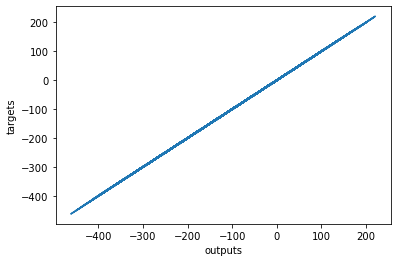

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()